<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Nearest Neighbors Regression

In this notebook we will learn how to perform nearest neighbors regression using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

The kNN regression model adapts naturally to nonlinear data, and can approximate functions of both a single input variable $x$ and several input variables $(x_1, x_2, \dots, x_n)$.

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
# ! pip install scikit-learn matplotlib numpy

In this case we are going to use a synthetic dataset generated from sinus curve with some added noise.

In [2]:
import numpy as np
np.random.seed(0)

# X is our input data for training
X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
# y is the target variable
y_train = np.sin(X_train).ravel()
# Add noise to targets
y_train[::5] += 1 * (0.5 - np.random.rand(8))


X_test = np.linspace(0, 5, 500)[:, np.newaxis]

Now we create an instance of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor"><code>sklearn.neighbors.KNeighborsRegressor</code></a> class specifiying the number (k) of <code>n_neighbors</code> used for predition, and fit the model to our data with the <code>fit()</code> method. 

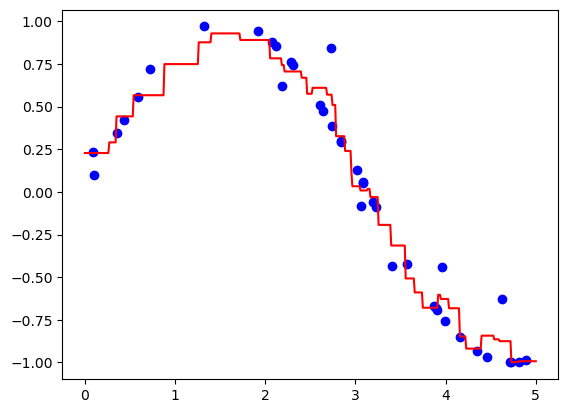

In [3]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN regression object
knn = KNeighborsRegressor(n_neighbors=3, weights='uniform')

knn.fit(X_train, y_train)
y_test = knn.predict(X_test)

# plot the data and predicted curve
import matplotlib.pylab as plt
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='red')

Let's visualize the output regression for different values of <code>n_neighbors</code>:

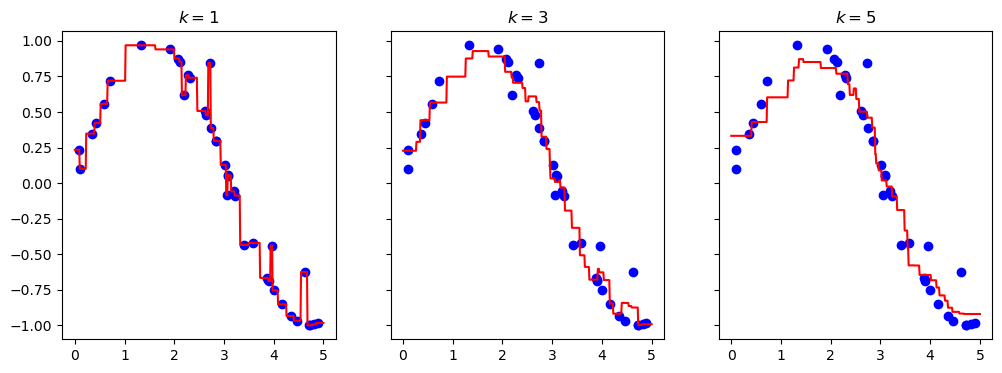

In [4]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

for i, n_neighbors in enumerate(range(1,6,2)):

    knn = KNeighborsRegressor(n_neighbors, weights='uniform')
    knn.fit(X_train, y_train)
    y_test = knn.predict(X_test)

    ax[i].scatter(X_train, y_train, color='blue')
    ax[i].plot(X_test, y_test, color='red')
    ax[i].set_title(r'$k=%d$'%n_neighbors)

### Distance-based weighting

By default the <code>KNeighborsRegressor</code> uses a uniform weights for prediction: all $k$ points in each neighborhood are weighted equally. But we can use distance-based so that each point is weighted by the inverse of its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

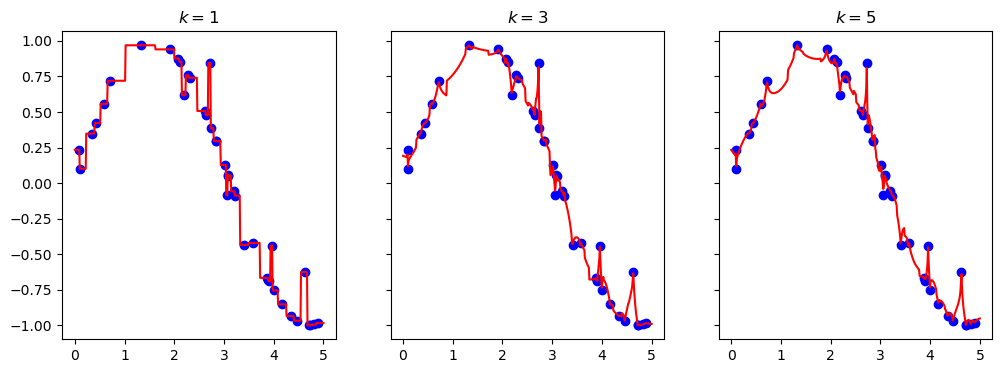

In [5]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

for i, n_neighbors in enumerate(range(1,6,2)):

    knn = KNeighborsRegressor(n_neighbors, weights='distance')
    knn.fit(X_train, y_train)
    y_test = knn.predict(X_test)

    ax[i].scatter(X_train, y_train, color='blue')
    ax[i].plot(X_test, y_test, color='red')
    ax[i].set_title(r'$k=%d$'%n_neighbors)

### EXERCISE

Use the <code>KNeighborsRegressor</code> in the boston house-price dataset and compare its performance with the <code>LinearRegression</code> in both the univariate and multivariate cases.